# **What is Sentiment Analysis**

Sentiment analysis (also known as opinion mining) is one of the many applications of Natural Language Processing. It is a set of methods and techniques used for extracting subjective information from text or speech, such as opinions or attitudes. In simple terms, it involves classifying a piece of text as positive, negative or neutral.

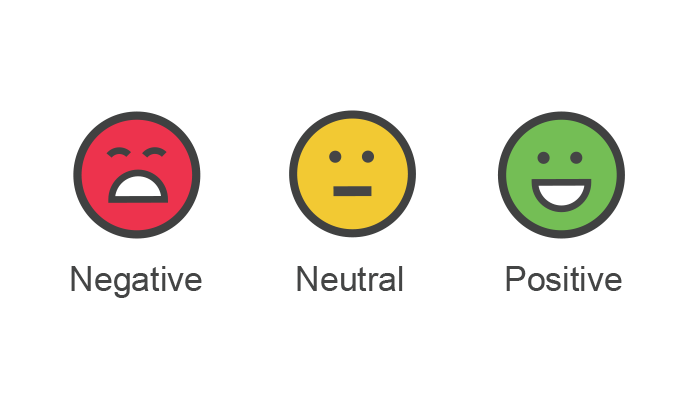

# **Problem statement**

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.
Formally, given a training sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist, your objective is to predict the labels on the labels on the given test dataset.

# **Importing required libraries**

In [ ]:
import re
import nltk
import string
import numpy as np
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_colwidth",200)

# **Importing dataset for project**

In [ ]:
df_train=pd.read_csv("/content/train_tweets_data.csv")
df_test=pd.read_csv("/content/test_tweets_data.csv")

**df_test is inference data.There are nan values in the label data.**

# **Concatination of train and test data**

In [ ]:
df=pd.concat([df_train,df_test],axis=0,ignore_index=True)

# **Data understanding**

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

**There are 49159 rows and 3 features in whole dataset**

In [ ]:
df.info()

**This dataframe contain tweet as categorical feature and label and id are numeric features.**

In [ ]:
df.dtypes

In [ ]:
df["label"].value_counts()

**This dataframe contain 0 and 1 class with inbalance records are there.Here class 0 is majortity while class 1 as minority class.**

# **Checking length of text**

In [ ]:
df1=df.copy()

In [ ]:
#Checking length of the text in tweet features.
length=df_train["length"]=df_train["tweet"].apply(lambda x:len(x))
length

# **Data cleaning process in NLP**

# **Converting text to lower case**

In [ ]:
df1["tweet"]= df1['tweet'].apply(lambda x: " ".join(x.lower()  for x in x.split()))
df1


# **Removing symbol pattern in the dataframe**

In [ ]:
def remove_pattern(input_text, pattern):
    """fuction to remove the tweeter handels
     data = df[tweet]"""
    r = re.findall(pattern, input_text)
    for i in r:
        input_text =  re.sub(i,"", input_text)
    return input_text

In [ ]:
df1["tweet"]=np.vectorize(remove_pattern)(df1["tweet"], "@[\w]*")

In [ ]:
df1

**From this above code we remove special pattern and also we can see that there are null value in the label data.**

# **Punctuation removal from tweet feature**

In [ ]:
df1['tweet'] = df1['tweet'].str.replace("[^a-zA-Z#]", " ")
df1

# **Stop word removal from given dataframe**

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
allstopwords = stopwords.words('english')
df1["tweet"]= df1["tweet"].apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))

# **Keeping words only size more than three**

In [ ]:
df1["tweet"] = df1["tweet"].apply(lambda x: " ".join(i for i in x.split()if len(i)>3))

In [ ]:
df1

In [ ]:
import nltk
nltk.download('punkt')
mystring = df1["tweet"]
tokens1=re.sub("[a-zA-Z]", "", str(df1["tweet"]))
tokens = nltk.word_tokenize(tokens1)

In [ ]:
# # text = "This is the first sentence. This is the second one. And this is the last one."
# import nltk
# from nltk.tokenize import sent_tokenize
# sentences = sent_tokenize(str(df1["tweet"]))
# words = [word_tokenize(sent) for sent in sentences]
# print(words)

In [ ]:
# import re

# #replace each non-letter with empty string
# x = re.sub('[^a-zA-Z]', ' ', str(df1["tweet"]))

# #display results
# print(x)

In [ ]:
# from textblob.blob import WordList
# # Printing original list
# print("Original list is : " + str(words))

# # initializing K
# K = '1'

# # using remove() to
# # Remove K String from String List
# while(K in words):
#     words.remove(K)

# # Printing modified list
# print("Modified list is : " + str(words))

In [ ]:
df1

# **Lemmatization**

In [ ]:
import nltk
nltk.download("wordnet")
nltk.download("omw-1.4")

In [ ]:
#Implementation of lemmatization
import nltk
from nltk.stem import WordNetLemmatizer

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
import textblob
from textblob import Word
df1["tweet"]=df1["tweet"].apply(lambda x: ",".join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
#Checking the implementation
df1

In [ ]:
#Code to split the text in tweet feature.
df_toan = df1["tweet"] = df1['tweet'].apply(lambda x: x.split())
df_toan.head()

In [ ]:
df2=df1.copy()

In [ ]:
for i in range(len(df2["tweet"])):
    df2["tweet"][i] = ' '.join(df2["tweet"][i])

# **EDA and Visualization**

# **Wordcloud of all tweet**

In [ ]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in df2['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# **Wordcloud Graph Racist/Sexist Tweets**

In [ ]:
from PIL import Image
im = Image.open('/content/WhatsApp Image 2023-06-25 at 12.26.25 PM.jpeg')
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

twitter_mask = np.array(Image.open('/content/WhatsApp Image 2023-06-25 at 12.26.25 PM.jpeg'))

wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=twitter_mask
)

wc.generate(' '.join(text for text in df2.loc[df2['label'] == 0, 'tweet']))

plt.figure(figsize=(18, 10))
plt.title('Top words for Twitter - Label=0', fontdict={'size': 22, 'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.show()

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets

HT_non_racist = hashtag_extract(df2['tweet'][df2['label'] == 0])

In [ ]:
# extracting hashtags from racist/sexist tweets
HT_racist = hashtag_extract(df2['tweet'][df2['label'] == 1])

In [ ]:
# unnesting list
HT_non_racist = sum(HT_non_racist,[])
HT_racist = sum(HT_racist,[])

In [ ]:
#Non-Racist/Sexist Tweets
a = nltk.FreqDist(HT_non_racist)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

**Observatation:**

1]Love word tweeted most of the time with # trend.

2]cute word tweeted mininmum time with # trend

In [ ]:
#Racist/Sexist Tweets

b = nltk.FreqDist(HT_racist)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

**Observatation:**

1]trump word tweeted most of the time with # trend.

2]hate word tweeted mininmum time with # trend

In [ ]:
plt.figure(figsize=(10, 6))
color = sns.color_palette()[0]
order = df2['label'].value_counts().index
ax = sns.countplot(data=df2, x='label', color=color, order=order)
plt.xlabel('label')
plt.ylabel('Count of Feedback')
plt.title('Feedback Count by Course Code')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge')
plt.show()


In [ ]:
 # Pie chart for Gender distribution
counts = df2['label'].value_counts()
labels = [f"{label}\n{count / len(df2) * 100:.1f}%" for label, count in counts.items()]
fig, ax = plt.subplots()
ax.pie(counts, labels=labels, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('label Distribution', fontsize=16, loc='left', pad=30)
ax.axis('equal')
plt.show()

In [ ]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()


# Importing CountVectorizer in order to implement the Bag of words model.
import pandas as pd
vectorizer = CountVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
count_matrix = vectorizer.fit_transform(df2["tweet"])
count_array = count_matrix.toarray()
BOW_df2= pd.DataFrame(data=count_array,columns = vectorizer.vocabulary_.keys())
print(BOW_df2)

In [ ]:
count_array[0]

In [ ]:
print(count_matrix)

In [ ]:
BOW_df2.shape

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df2['tweet'])
bow_array=bow.toarray()
df2=pd.DataFrame(data=bow_array,columns=bow_vectorizer.vocabulary_.keys())


In [ ]:
df2.shape

In [ ]:
df2

In [ ]:
train_bow_data=df2.iloc[:31962,:]
infer_bow_data=df2.iloc[31962:,:]

In [ ]:
infer_bow_data.to_csv("infer_bow_data.csv",index=False)

In [ ]:
train_bow_data.shape

In [ ]:
df_train["label"].value_counts()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# Assuming X contains the independent features and y contains the dependent variable

# Step 5: Apply oversampling techniques (Random Oversampling)
ros = RandomOverSampler(random_state=42)
X_train_minority_oversampled, y_train_minority_oversampled = ros.fit_resample(train_bow_data,df_train["label"])


In [ ]:
print(X_train_minority_oversampled.shape)
y_train_minority_oversampled.value_counts()

In [ ]:
df2=pd.concat([X_train_minority_oversampled, y_train_minority_oversampled],axis=1)

In [ ]:
df2

In [ ]:
type(y_train_minority_oversampled)

In [ ]:
plt.figure(figsize=(10, 6))
color = sns.color_palette()[0]
order = y_train_minority_oversampled.value_counts().index
ax = sns.countplot(data=df2, x='label', color=color, order=order)
plt.xlabel('label')
plt.ylabel('Count of Feedback')
plt.title('Feedback Count by Course Code')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge')
plt.show()


# **Model fitting on the data**

# **MOdel1-Logistice Regression using BOW**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_train,X_test,y_train,y_test=train_test_split(X_train_minority_oversampled,y_train_minority_oversampled,random_state=0,test_size=0.30)
lreg=LogisticRegression()
lreg.fit(X_train,y_train)
y_pred_train=lreg.predict(X_train)

prediction = lreg.predict_proba(X_train)
train_proba = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
pred_train_proba= train_proba.astype(int)
print(f1_score(y_train, pred_train_proba))

prediction = lreg.predict_proba(X_test)
train_proba = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
pred_test_proba= train_proba.astype(int)
y_pred_test=lreg.predict(X_test)
print(f1_score(y_test, pred_test_proba))







In [ ]:
X1_train_minority_oversampled=X_train_minority_oversampled.copy()
y1_train_minority_oversampled=y_train_minority_oversampled.copy()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X1_train_minority_oversampled,y1_train_minority_oversampled,test_size=0.10,random_state=0)
X_train1,X_val1,y_train1,y_val1=train_test_split(X_train,y_train,test_size=0.10,random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val1.shape)
print(y_val1.shape)
print(X_train1.shape)
print(X_test.shape)

In [ ]:
X_val1.to_csv("X_val1.csv",index=False)


In [ ]:
y_val1.to_csv("y_val1.csv",index=False)

In [ ]:
X_train.to_csv("X_train.csv",index=False)
X_test.to_csv("X_test.csv",index=False)
y_train.to_csv("y_train.csv",index=False)
y_test.to_csv("y_test.csv",index=False)
X_train1.to_csv("X_train1.csv",index=False)
y_train1.to_csv("y_train1.csv",index=False)

In [ ]:
print(X_train.shape)

In [ ]:
print(X_train1.shape)

In [ ]:
type(X_train)

In [ ]:
from lightgbm import LGBMClassifier
model=LGBMClassifier()
model.fit(X_train,y_train)

In [ ]:
y_pred_train= model.predict(X_train)
y_pred_test= model.predict(X_test)
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test, y_pred_test))

# **Evaluation of performance of Logistic Regression**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['y_test', 'y_pred_test'],
            yticklabels=['y_test', 'y_pred_test'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred_test)
print("Precision :", precision)
recall = recall_score(y_test,y_pred_test)

# **Predicting Inference data using logistic regression**

In [ ]:
pred_infer_bow=lreg.predict_proba(infer_bow_data)
pred_infer_bow_int=pred_infer_bow[:,1]>=0.3
pred_infer_bow_int=pred_infer_bow_int.astype(int)
print(pred_infer_bow_int)
print(pred_infer_bow_int.shape)

# **Model2-RandomForest model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,max_depth=100,random_state=0).fit(X_train, y_train)
y_pred_train= rf.predict(X_train)
y_pred_test= rf.predict(X_test)
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test, y_pred_test))

# **Predicting Inference data on RandomForest model**

In [ ]:
pred_infer_bow=rf.predict_proba(infer_bow_data)
pred_infer_bow_int=pred_infer_bow[:,1]>=0.3
pred_infer_bow_int=pred_infer_bow_int.astype(int)
print(pred_infer_bow_int)
print(pred_infer_bow_int.shape)

# **Model3-SVM Model**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn import svm
svc=svm.SVC(kernel="linear",C=1,probability=True).fit(X_train,y_train)
y_pred_train_svm=svc.predict_proba(X_train)
y_pred_train_svm_int=y_pred_train_svm[:,1]>=0.3
y_pred_train_svm_int=y_pred_train_svm_int.astype(int)
print(f1_score(y_train,y_pred_train_svm_int))

y_pred_test_svm=svc.predict_proba(X_test)
y_pred_test_svm_int=y_pred_test_svm[:,1]>=0.3
y_pred_test_svm_int=y_pred_test_svm_int.astype(int)
f1_score(y_test,y_pred_test_svm_int)


# **Predciting Inference data on SVM**

In [ ]:
pred_infer_bow=svc.predict_proba(infer_bow_data)
pred_infer_bow_int=pred_infer_bow[:,1]>=0.3
pred_infer_bow_int=pred_infer_bow_int.astype(np.int)
print(pred_infer_bow_int)
print(pred_infer_bow_int.shape)

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=3, n_estimators=1000).fit(X_train,y_train)
y_pred_train= xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
print(f1_score(y_train, y_pred_train))
print(f1_score(y_test, y_pred_test))

# **Predciting Inference data on XGBoost**

In [ ]:
pred_infer_bow=xgb_model.predict_proba(infer_bow_data)
pred_infer_bow_int=pred_infer_bow[:,1]>=0.3
pred_infer_bow_int=pred_infer_bow_int.astype(np.int)
print(pred_infer_bow_int)
print(pred_infer_bow_int.shape)

In [ ]:
# # Importing Required Library
# import lightgbm as lgb

# # Similarly LGBMRegressor can also be imported for a regression model.
# from lightgbm import LGBMClassifier
# model=LGBMClassifier()

# model.fit(X_train,y_train)
# y_pred_train=model.predict_proba(X_train)
# y_pred_train_int=y_pred_train[:,1]>=0.3
# y_pred_train_svm_int=y_pred_train_int.astype(np.int)
# print(f1_score(y_train,y_pred_train_int))

# y_pred_test=svc.predict_proba(X_test)
# y_pred_test_int=y_pred_test[:,1]>=0.3
# y_pred_test_int=y_pred_test_int.astype(np.int)
# f1_score(y_test,y_pred_test_svm_int)

# **TF-Idf**

In [ ]:
df4=df2.copy()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
tfidf= vectorizer.fit_transform(df2["tweet"])

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
train_tfidf_data=tfidf[:31962,:]
infer_tfidf_data=tfidf[31962:,:]

# **Applying Logistic Regression using TFIDF**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf=train_test_split(X_train_minority_oversampled, y_train_minority_oversampled,test_size=0.30,random_state=0)

lreg=LogisticRegression()
lreg.fit(X_train_tfidf,y_train_tfidf)
y_pred_train=lreg.predict(X_train_tfidf)

prediction = lreg.predict_proba(X_train_tfidf)
train_proba = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
pred_train_proba= train_proba.astype(np.int)
print(f1_score(y_train_tfidf, pred_train_proba))

prediction = lreg.predict_proba(X_test_tfidf)
train_proba = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
pred_test_proba= train_proba.astype(np.int)
y_pred_test=lreg.predict(X_test_tfidf)
print(f1_score(y_test_tfidf, pred_test_proba))


# **Predicting Inference data on logistic regression**

In [ ]:
pred_infer_bow=lreg.predict_proba(infer_bow_data)
pred_infer_bow_int=pred_infer_bow[:,1]>=0.3
pred_infer_bow_int=pred_infer_bow_int.astype(np.int)
print(pred_infer_bow_int)
print(pred_infer_bow_int.shape)

# **Applying svm using TFIDF**

In [ ]:
from sklearn import svm
svc=svm.SVC(kernel="rbf",C=0.1,probability=True,gamma=0.0001).fit(X_train_tfidf,y_train_tfidf)
y_pred_train_svm=svc.predict_proba(X_train_tfidf)
y_pred_train_svm_int=y_pred_train_svm[:,1]>=0.3
y_pred_train_svm_int=y_pred_train_svm_int.astype(np.int)
print(f1_score(y_train_tfidf,y_pred_train_svm_int))

y_pred_test_svm=svc.predict_proba(X_test_tfidf)
y_pred_test_svm_int=y_pred_test_svm[:,1]>=0.3
y_pred_test_svm_int=y_pred_test_svm_int.astype(np.int)
f1_score(y_test_tfidf,y_pred_test_svm_int)

In [ ]:
pred_infer_bow=svc.predict_proba(infer_bow_data)
pred_infer_bow_int=pred_infer_bow[:,1]>=0.3
pred_infer_bow_int=pred_infer_bow_int.astype(np.int)
print(pred_infer_bow_int)
print(pred_infer_bow_int.shape)

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=3, n_estimators=1000).fit(X_train_tfidf,y_train_tfidf)
y_pred_train_xgb_model =xgb_model.predict_proba(X_train_tfidf)
y_pred_train_xgb_model_int=y_pred_train_xgb_model[:,1]>=0.3
y_pred_train_xgb_model_int=y_pred_train_xgb_model_int.astype(np.int)
print(f1_score(y_train_tfidf,y_pred_train_xgb_model_int))

y_pred_test_xgb_model =xgb_model.predict_proba(X_test_tfidf)
y_pred_test_xgb_model_int=y_pred_test_xgb_model[:,1]>=0.3
y_pred_test_xgb_model_int=y_pred_test_xgb_model_int.astype(np.int)
f1_score(y_test_tfidf,y_pred_test_svm_int)

# **Predicting Inference data on svm**

In [ ]:
pred_infer_bow=xgb_model.predict_proba(infer_bow_data)
pred_infer_bow_int=pred_infer_bow[:,1]>=0.3
pred_infer_bow_int=pred_infer_bow_int.astype(np.int)
print(pred_infer_bow_int)
print(pred_infer_bow_int.shape)

# **Final conclusion**

# **BERT implemetation**

In [ ]:
! pip install bert-serving-server
! pip install bert-serving-client

In [ ]:

# from bert_serving.client import BertClient

# # make a connection with the BERT server using it's ip address
# bc = BertClient()
# # get the embedding for train and val sets
# X_train_bert = bc.encode(X_train.tolist())
# X_test_bert = bc.encode(X_test.tolist())
# from sklearn.linear_model import LogisticRegression

# # LR model
# model_bert = LogisticRegression()
# # train
# model_bert = model_bert.fit(X_train_bert, y_train)
# # predict
# pred_bert_train = model_bert.predict(X_train_bert)
# pred_bert_test = model_bert.predict(X_test_bert)

# print(f1_score(y_train, pred_bert_train))
# print(f1_score(y_test, pred_bert_test))